# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [4]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [5]:
df = df.drop_duplicates() 
df.shape

(804, 12)

In [6]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [7]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [8]:
iqr = df.Price.quantile(0.75) - df.Price.quantile(0.25)
upper_threshold = df.Price.quantile(0.75) + (1.5 * iqr) # q3 + 1.5iqr
lower_threshold = df.Price.quantile(0.25) - (1.5 * iqr) # q1 - 1.5iqr
upper_threshold,lower_threshold

(45383.68078365926, -4393.290277667038)

In [9]:
df.Price = df.Price.clip(-4393, 45383)

In [10]:
iqr1 = df.Mileage.quantile(0.75) - df.Mileage.quantile(0.25)
upper_threshold = df.Mileage.quantile(0.75) + (1.5 * iqr1) # q3 + 1.5iqr
lower_threshold = df.Mileage.quantile(0.25) - (1.5 * iqr1) # q1 - 1.5iqr
upper_threshold,lower_threshold

(41097.25, -1260.75)

In [11]:
df.Mileage = df.Mileage.clip(-1260, 41097)

In [12]:
iqr2 = df.Cylinder.quantile(0.75) - df.Cylinder.quantile(0.25)
upper_threshold = df.Cylinder.quantile(0.75) + (1.5 * iqr2) # q3 + 1.5iqr
lower_threshold = df.Cylinder.quantile(0.25) - (1.5 * iqr2) # q1 - 1.5iqr
upper_threshold,lower_threshold

(9.0, 1.0)

In [13]:
iqr3 = df.Liter.quantile(0.75) - df.Liter.quantile(0.25)
upper_threshold = df.Liter.quantile(0.75) + (1.5 * iqr3) # q3 + 1.5iqr
lower_threshold = df.Liter.quantile(0.25) - (1.5 * iqr3) # q1 - 1.5iqr
upper_threshold,lower_threshold

(6.199999999999999, -0.1999999999999993)

In [14]:
iqr4 = df.Doors.quantile(0.75) - df.Doors.quantile(0.25)
upper_threshold = df.Doors.quantile(0.75) + (1.5 * iqr4) # q3 + 1.5iqr
lower_threshold = df.Doors.quantile(0.25) - (1.5 * iqr4) # q1 - 1.5iqr
upper_threshold,lower_threshold

(4.0, 4.0)

In [15]:
df.Doors = df.Doors.clip(2, 4)

In [16]:
iqr5 = df.Cruise.quantile(0.75) - df.Cruise.quantile(0.25)
upper_threshold = df.Cruise.quantile(0.75) + (1.5 * iqr5) # q3 + 1.5iqr
lower_threshold = df.Cruise.quantile(0.25) - (1.5 * iqr5) # q1 - 1.5iqr
upper_threshold,lower_threshold

(1.0, 1.0)

In [17]:
iqr6 = df.Sound.quantile(0.75) - df.Sound.quantile(0.25)
upper_threshold = df.Sound.quantile(0.75) + (1.5 * iqr6) # q3 + 1.5iqr
lower_threshold = df.Sound.quantile(0.25) - (1.5 * iqr6) # q1 - 1.5iqr
upper_threshold,lower_threshold

(2.5, -1.5)

In [18]:
iqr7 = df.Leather.quantile(0.75) - df.Leather.quantile(0.25)
upper_threshold = df.Leather.quantile(0.75) + (1.5 * iqr7) # q3 + 1.5iqr
lower_threshold = df.Leather.quantile(0.25) - (1.5 * iqr7) # q1 - 1.5iqr
upper_threshold,lower_threshold

(2.5, -1.5)

In [19]:
# Task 1

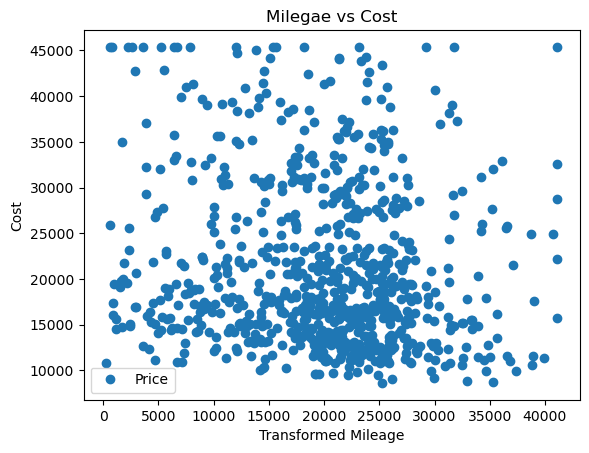

,transformed,Price
transformed,1.000000,-0.138996
Price,-0.138996,1.000000


In [20]:
#EDA
df['transformed'] = (df['Mileage']) 
df.plot(x='transformed', y='Price', style='o')
plt.title('Milegae vs Cost')
plt.xlabel('Transformed Mileage')
plt.ylabel('Cost')
plt.show()
df[['transformed','Price']].corr()

In [21]:
X = df[['Mileage']].values 
y = df['Price'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

coeff_df = pd.DataFrame(regressor.coef_,['Mileage'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Mileage,-1080.010552


In [23]:
regressor.intercept_

21031.58924034538

-1080.0105523351356 21031.58924034538


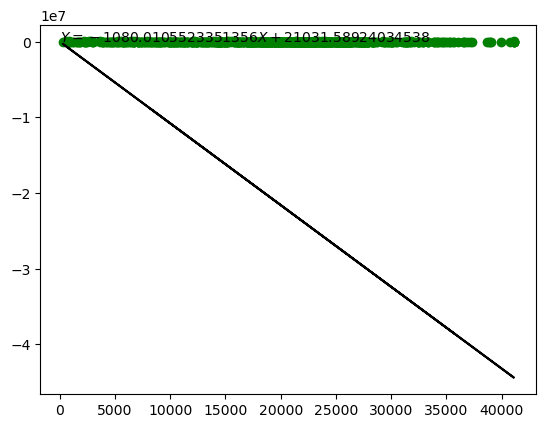

In [24]:
fig = plt.figure()
ax = fig.add_subplot()
plt.scatter(X, y, color='g')
plt.plot(X, regressor.predict(X),color='k')
ax.text(1, 4, f'$Y = {regressor.coef_[0]}X + {regressor.intercept_}$', fontsize=10)


print(regressor.coef_[0], regressor.intercept_)

In [25]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.0373461152256791


In [26]:
# Task 2

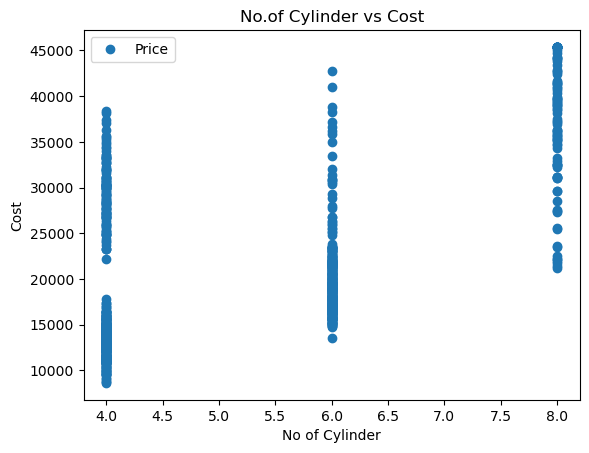

,Cylinder,Price
Cylinder,1.000000,0.569794
Price,0.569794,1.000000


In [27]:
#df.groupby('Cylinder')['Price'].mean().plot()
df.plot(x='Cylinder', y='Price', style='o')
plt.title('No.of Cylinder vs Cost')
plt.xlabel('No of Cylinder')
plt.ylabel('Cost')
plt.show()
df[['Cylinder','Price']].corr()

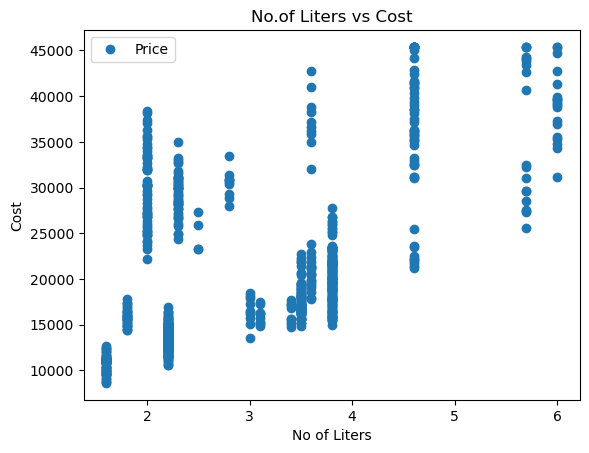

,Liter,Price
Liter,1.000000,0.570743
Price,0.570743,1.000000


In [28]:
#df.groupby('Liter')['Price'].mean().plot()
df.plot(x='Liter', y='Price', style='o')
plt.title('No.of Liters vs Cost')
plt.xlabel('No of Liters')
plt.ylabel('Cost')
plt.show()
df[['Liter','Price']].corr()

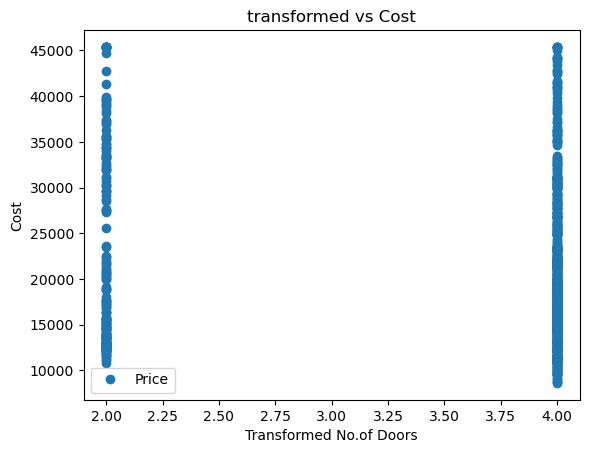

,transformed,Price
transformed,1.000000,-0.108916
Price,-0.108916,1.000000


In [29]:
df['transformed'] = (df['Doors'])
#df.groupby('Doors')['Price'].mean().plot()
df.plot(x='transformed', y='Price', style='o')
plt.title('transformed vs Cost')
plt.xlabel('Transformed No.of Doors')
plt.ylabel('Cost')
plt.show()
df[['transformed','Price']].corr()

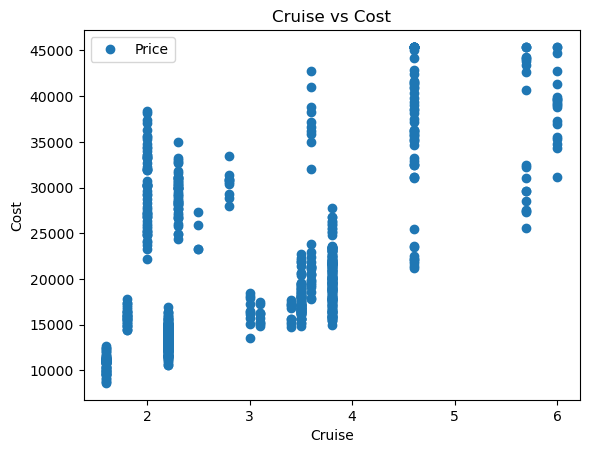

,Cruise,Price
Cruise,1.000000,0.456112
Price,0.456112,1.000000


In [30]:
#df.groupby('Cruise')['Price'].mean().plot()
df.plot(x='Liter', y='Price', style='o')
plt.title('Cruise vs Cost')
plt.xlabel('Cruise')
plt.ylabel('Cost')
plt.show()
df[['Cruise','Price']].corr()

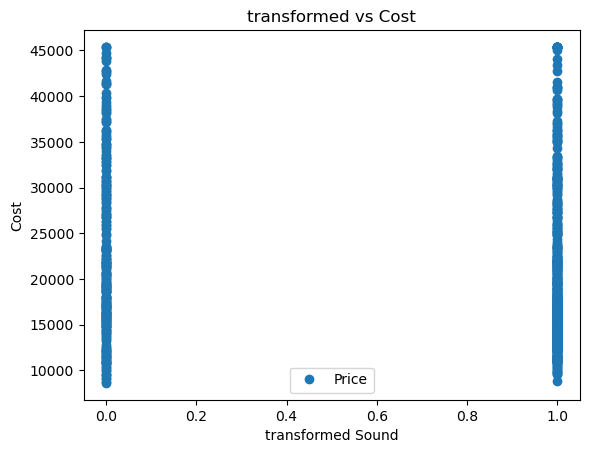

,transformed,Price
transformed,1.000000,-0.149584
Price,-0.149584,1.000000


In [31]:
df['transformed'] = (df['Sound'])
#df.groupby('Sound')['Price'].mean().plot()
df.plot(x='transformed', y='Price', style='o')
plt.title('transformed vs Cost')
plt.xlabel('transformed Sound')
plt.ylabel('Cost')
plt.show()
df[['transformed','Price']].corr()

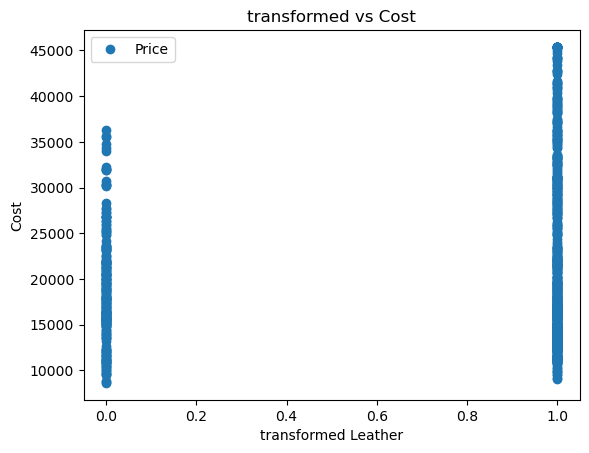

,transformed,Price
transformed,1.000000,0.155412
Price,0.155412,1.000000


In [32]:
df['transformed'] = (df['Leather'])
#df.groupby('Leather')['Price'].mean().plot()
df.plot(x='transformed', y='Price', style='o')
plt.title('transformed vs Cost')
plt.xlabel('transformed Leather')
plt.ylabel('Cost')
plt.show()
df[['transformed','Price']].corr()

In [33]:
X = df[['Mileage','Cylinder', 'Liter','Doors', 'Cruise','Sound','Leather']].values #array of features
y = df['Price'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

coeff_df = pd.DataFrame(regressor.coef_,['Mileage','Cylinder', 'Liter','Doors', 
                                         'Cruise','Sound','Leather'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Mileage,-1213.877513
Cylinder,3905.210698
Liter,27.596696
Doors,-721.157275
Cruise,2695.396008
Sound,-1237.867986
Leather,1431.725532


In [35]:
regressor.intercept_ 

20979.304387749813

In [36]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.4791092155187


In [37]:
#the combination of the factors that is the best predictor for price.

In [38]:
from itertools import combinations

feature =['Mileage','Cylinder', 'Liter','Doors', 'Cruise','Sound','Leather']
comb=[]
comb_R2_score =[]
for i in range(1, len(feature)+1):
    fact = list(combinations(['Mileage','Cylinder', 'Liter','Doors', 'Cruise','Sound','Leather'],i))
    for j in fact:
        comb.append(j)
        
for j in comb:
    X = df.loc[:,j].values
    Y = df.loc[:,'Price'].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state =10)
    reg = LinearRegression()
    reg.fit(X_train, Y_train)
    Y_Pred = reg.predict(X_test)
    s = reg.score(X_test, Y_test)
    comb_R2_score.append(s)
    
ind = comb_R2_score.index(max(comb_R2_score))
print("The best combination is:", *comb[ind], "R2_score:", comb_R2_score[ind])

The best combination is: Mileage Cylinder Doors Cruise Sound Leather R2_score: 0.4828911748578365


In [39]:
feature =['Mileage','Cylinder', 'Liter','Doors', 'Cruise','Sound','Leather']
target =['Price']
X = df[feature]
Y = df[target]
comb=[]

for i in range(1,7):
    comb.append(combinations(feature,i))
    

check_score = 0
for combin in comb:
    for groupx in combin:
        groupx = list(groupx)
        x = df[groupx]
        
        model = linear_model.LinearRegression(fit_intercept = False)
        model = model.fit(x,Y)
        model_score = model.score(x,Y)
        if check_score < model.score(x,Y):
            check_score = model.score(x,Y)
            maxgroup = groupx
            
print(maxgroup, "model_score =", check_score)            

['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather'] model_score = 0.44380680403463024


In [40]:
# Task 3

In [54]:
new_df = df.copy()

new_df = pd.get_dummies(new_df,columns = ['Make', 'Model','Type'])
new_df

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,transformed,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Sedan 4D,6,3.1,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Sedan 4D,6,3.1,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,Sedan 4D,6,3.1,4,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,Sedan 4D,6,3.1,4,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,L300 Sedan 4D,6,3.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,19095,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,20484,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,25979,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [71]:
new_df.isnull().sum()
list(new_df)

['Price',
 'Mileage',
 'Trim',
 'Cylinder',
 'Liter',
 'Doors',
 'Cruise',
 'Sound',
 'Leather',
 'transformed',
 'Make_Buick',
 'Make_Cadillac',
 'Make_Chevrolet',
 'Make_Pontiac',
 'Make_SAAB',
 'Make_Saturn',
 'Model_9-2X AWD',
 'Model_9_3',
 'Model_9_3 HO',
 'Model_9_5',
 'Model_9_5 HO',
 'Model_AVEO',
 'Model_Bonneville',
 'Model_CST-V',
 'Model_CTS',
 'Model_Cavalier',
 'Model_Century',
 'Model_Classic',
 'Model_Cobalt',
 'Model_Corvette',
 'Model_Deville',
 'Model_G6',
 'Model_GTO',
 'Model_Grand Am',
 'Model_Grand Prix',
 'Model_Impala',
 'Model_Ion',
 'Model_L Series',
 'Model_Lacrosse',
 'Model_Lesabre',
 'Model_Malibu',
 'Model_Monte Carlo',
 'Model_Park Avenue',
 'Model_STS-V6',
 'Model_STS-V8',
 'Model_Sunfire',
 'Model_Vibe',
 'Model_XLR-V8',
 'Type_Convertible',
 'Type_Coupe',
 'Type_Hatchback',
 'Type_Sedan',
 'Type_Wagon']

In [75]:
df['Make'] = pd.to_numeric(df['Make'], errors ='coerce')
df['Model'] = pd.to_numeric(df['Model'], errors ='coerce')
df['Type'] = pd.to_numeric(df['Type'], errors ='coerce')

  

In [82]:
df = pd.read_csv('car_data.csv', usecols=['Mileage','Cylinder', 'Liter','Doors',
                                          'Cruise','Sound','Leather','Model','Make','Type','Price'])
df.columns = df.columns.str.strip()

In [88]:

cols = new_df.select_dtypes(exclude=['float']).columns

new_df[cols] = new_df[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

In [91]:
new_df.replace([np.inf, -np.inf], np.nan, inplace=True)
feature =['Mileage','Cylinder', 'Liter','Doors', 'Cruise','Sound','Leather','Model','Make','Type']
target =['Price']
X = df[feature]
Y = df[target]
comb=[]

for i in range(0,10):
    comb.append(combinations(feature,i))
    

check_score = 0
for combin in comb:
    for groupx in combin:
        groupx = list(groupx)
        x = df[groupx]
        
        model = linear_model.LinearRegression(fit_intercept = False)
        model = model.fit(x,Y)
        model_score = model.score(x,Y)
        if check_score < model.score(x,Y):
            check_score = model.score(x,Y)
            maxgroup = groupx
            
print(maxgroup, "model_score =", check_score)            

ValueError: at least one array or dtype is required

In [90]:
#feature =['Mileage','Trim','Cylinder','Liter','Doors','Cruise','Sound','Leather','transformed','Make_Buick','Make_Cadillac',
# 'Make_Chevrolet','Make_Pontiac','Make_SAAB','Make_Saturn','Model_9-2X AWD','Model_9_3','Model_9_3 HO','Model_9_5','Model_9_5 HO',
# 'Model_AVEO','Model_Bonneville','Model_CST-V','Model_CTS','Model_Cavalier','Model_Century','Model_Classic','Model_Cobalt',
# 'Model_Corvette','Model_Deville','Model_G6','Model_GTO','Model_Grand Am','Model_Grand Prix','Model_Impala','Model_Ion','Model_L Series',
# 'Model_Lacrosse','Model_Lesabre','Model_Malibu','Model_Monte Carlo','Model_Park Avenue','Model_STS-V6','Model_STS-V8',
# 'Model_Sunfire','Model_Vibe','Model_XLR-V8','Type_Convertible','Type_Coupe','Type_Hatchback','Type_Sedan','Type_Wagon']

feature =['Mileage','Cylinder', 'Liter','Doors', 'Cruise','Sound','Leather','Model','Make','Type']
comb=[]
comb_R2_score =[]
for i in range(1, len(feature)+1):
    fact = list(combinations(['Mileage','Cylinder', 'Liter','Doors', 'Cruise','Sound','Leather','Model','Make','Type'],i))
    for j in fact:
        comb.append(j)
        
for j in comb:
    X = df.loc[:,j].values
    Y = df.loc[:,'Price'].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state =10)
    reg = LinearRegression()
    reg.fit(X_train, Y_train)
    Y_Pred = reg.predict(X_test)
    s = reg.score(X_test, Y_test)
    comb_R2_score.append(s)
       
ind = comb_R2_score.index(max(comb_R2_score))
print("The best combination is:", *comb[ind], "R2_score:", comb_R2_score[ind]) 

ValueError: could not convert string to float: 'G6'